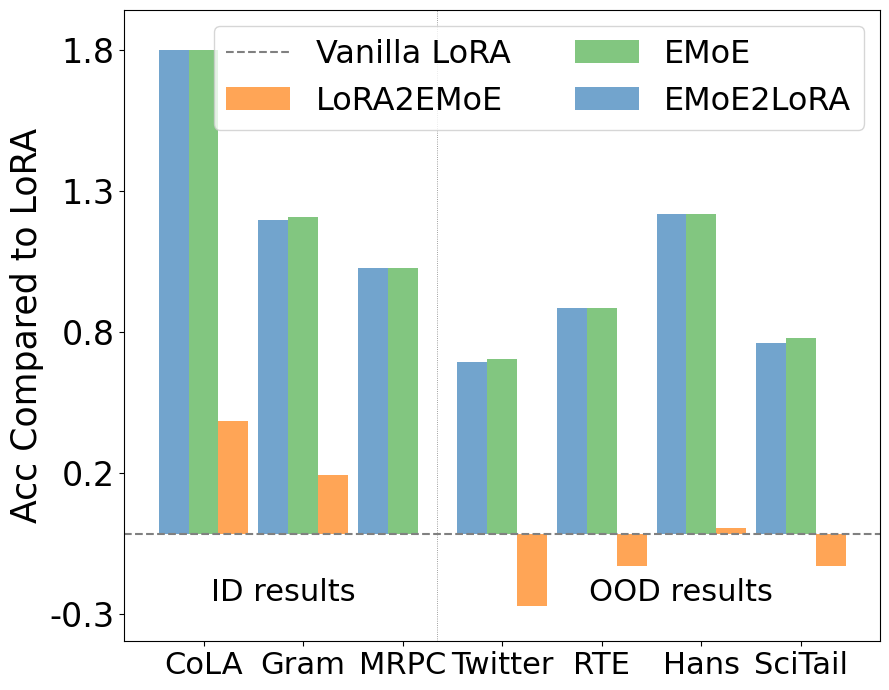

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

data = {
    'Algorithm': ['LoRA', 'LoRA2EMoE', 'EMoE', 'EMoE2LoRA'],
    'CoLA': [(60.89, 2.55), (61.31, 2.14), (62.69, 0.91), (62.69, 0.91)],
    'MRPC': [(86.83, 0.87), (86.83, 0.91), (87.82, 0.17), (87.82, 0.17)],
    'RTE': [(78.7, 1.02), (78.58, 0.95), (79.54, 0.45), (79.54, 0.45)],
    'Gram': [(41.77, 1.62), (41.99, 1.56), (42.95, 0.95), (42.94, 0.95)],
    'Twitter': [(75.42, 2.71), (75.15, 3.02), (76.07, 2.12), (76.06, 2.12)],

    'Hans': [(60.37, 1.31), (60.39, 1.32), (61.56, 1.65), (61.56, 1.65)],
    'SciTail': [(77.36, 0.73), (77.24, 0.68), (78.09, 0.56), (78.07, 0.58)],
}


data_expanded = {'Algorithm': data['Algorithm']}
for key, values in data.items():
    if key != 'Algorithm':
        data_expanded[key + '_mean'] = [x[0] for x in values]
        data_expanded[key + '_std'] = [x[1] for x in values]


df = pd.DataFrame(data_expanded)

datasets = ['CoLA', 'Gram', 'MRPC', 'Twitter', 'RTE', 'Hans', 'SciTail'] #, 'STSB', 'SICK']
for dataset in datasets:
    lora_val = df[df['Algorithm'] == 'LoRA'][f'{dataset}_mean'].values[0]
    df[f'{dataset}_change'] = df[f'{dataset}_mean'] - lora_val


fig, ax = plt.subplots(figsize=(9, 7))

colors = ['#1f77b4', '#ff7f0e', '#4daf4a', '#377eb8']
linestyles = ['-', '--', '-.', ':']
x_changes = [0.2, 0.3, -0.0, -0.3]
for idx, algorithm in enumerate(df['Algorithm']):
    changes = [df[f'{dataset}_change'].iloc[idx] for dataset in datasets]
    if algorithm != 'LoRA':
        ax.bar([x + x_changes[idx] for x in range(len(datasets))], changes, width=0.3, label=algorithm, color=colors[idx], alpha=0.7)
    
# Setting up labels, title, and legend
ax.axhline(0, color='gray', linestyle='--', label="Vanilla LoRA")

ax.axvline(2.35, color='gray', linestyle=':', linewidth=0.6)

ax.set_ylabel('Acc Compared to LoRA', fontsize=25)
ax.set_ylim(-0.4, 1.95)
ax.set_yticks(np.linspace(-0.3, 1.8, 5))
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=24)
# ax.set_xlabel('Datasets', fontsize=25)
ax.set_xticks([x for x in range(len(datasets))])
ax.set_xticklabels(datasets, rotation=0, fontsize=24)
# ax.set_title('Relative performance change of algorithms compared to LoRA across different datasets')
ax.legend(fontsize=23, ncol=2, fancybox=True)
ax.annotate("ID results", (0.8, -0.3), fontsize=22, xytext=(0, 10), textcoords='offset points', ha='center')
ax.annotate("OOD results", (4.8, -0.3), fontsize=22, xytext=(0, 10), textcoords='offset points', ha='center')
plt.xticks(rotation=0, fontsize=22)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.grid(True)
plt.savefig('train_test_different_bar.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


